In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import scipy.signal
import sys
from math import sqrt, pi, cos, sin ,hypot
import cv2

In [2]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])


Hough Implementation:

In [3]:
def hough_circles(startimg,sobelmag,h,w):

    image = startimg
    maxrad=20
    accmatrix=np.zeros((maxrad+1,h+1,w+1))

    for x in range(0,h,2):
        for y in range(0,w,2):
            if(sobelmag[x][y]==255.0):
                for radius in range (10,21):
                    # print radius
                    for theta in range (0,361):
                        a =int( x - ((radius)*cos((theta*pi) /180)))
                        b =int( y - ((radius)*sin((theta*pi) /180)))
                        if(a>=0 and b>=0 and a<h and b<w):
                            accmatrix[radius][a][b]+=1

    maxcirclesmatrix = []
    for x in range(0,h,2):
        for y in range(0,w,2):
            for radius in range(10,21):
                if(accmatrix[radius][x][y]>50):
                    maxcirclesmatrix.append([radius,x,y,accmatrix[radius][x][y]])
                    
    printedcircles = []
    firsttime = 0
    flag=0
    maxcirclesmatrix = sorted(maxcirclesmatrix, key=lambda circle: circle[0])
    maxcirclesmatrix = maxcirclesmatrix[::-1]

    printedcircles.append(maxcirclesmatrix[0])
    for i in range(0,len(maxcirclesmatrix)):
        flag = 0
        for j in range(0,len(printedcircles)):
            if(smallDist(maxcirclesmatrix[i],printedcircles[j])):
                flag = 1
                break
        if flag == 0:
            printedcircles.append(maxcirclesmatrix[i])


    for circle in printedcircles:
        cv2.circle(image, (circle[2],circle[1]), circle[0], (0,255,0), thickness=1, lineType=8, shift=0)

    plt.imshow(image)
    plt.show()
    return accmatrix

In [4]:
def smallDist(circle1,circle2):
    d = np.sqrt( (circle2[1]-circle1[1])**2 + (circle2[2]-circle1[2])**2 )
    if(d <= 30):
        return True
    else:
        return False

Sobel implementation , and call Hough

In [5]:
def main(argv1,argv2):
    
    arv1 = str(argv1)
    # Load an image
    f = np.array(Image.open(argv1))
    startimg = f
    plt.imshow(f, cmap='gray')
    plt.show()

    filter_gx_sobel = np.array([
            [1.0, 0.0, -1.0],
            [2.0, 0.0, -2.0],
            [1.0, 0.0, -1.0],
        ])

    filter_gy_sobel = np.array([
            [1.0, 2.0, 1.0],
            [0.0, 0.0, 0.0],
            [-1.0, -2.0, -1.0],
        ])

    if(len(f.shape)<3):
          print 'gray'
    elif len(f.shape)==3:
          f = rgb2gray(f)

    sobel_x = []
    sobel_y = []

    sobel_x = scipy.signal.convolve2d(f, filter_gx_sobel, mode='same')
    sobel_y = scipy.signal.convolve2d(f, filter_gy_sobel, mode='same')

    sobelmag = np.sqrt(sobel_x * sobel_x + sobel_y * sobel_y)

    sobelmag_max = np.max(sobelmag)
    threshold = float(argv2) * sobelmag_max #calculate threshold value

    h,w = sobelmag.shape

    for i in range(0,h):
        for j in range(0,w):
            if(sobelmag[i][j]>=threshold):
                sobelmag[i][j]=255.0
            else:
                sobelmag[i][j]=0
   
    hough_circles(startimg,sobelmag,h,w)

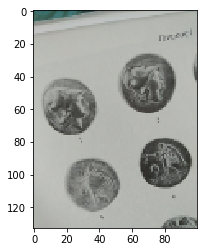

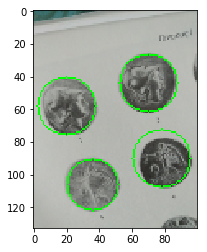

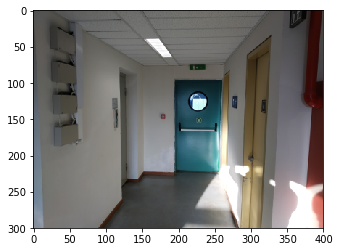

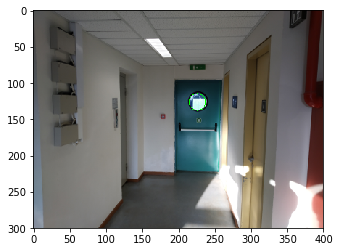

In [6]:
if __name__ == "__main__":
    main("cv_coins2.png",0.25)
    main("cv_firstfloor.png",0.3)